# Statistical Inference on the Affect of Ascites and D-Penicillamine in Primary Biliary cirrhosis Patients' Mortality

#### Authors: Hrishi Logani, Rithika Nair, Yuexiang Ni, Yuxi Zhang (Group 43)

## Introduction

Primary biliary cirrhosis (PBC) is a chronic disease where the bile ducts in the liver slowly get damaged and destroyed, thus leading to liver damage. It is one of the major causes of liver-related morbidity and mortality. Various factors affect the prognosis of PBC which is crucial in effectively treating patients (Prince et al., 2002). Ascites, which is the build-up of fluid in abdominal regions, is one of the major complications of advanced PBC (Purohit, 2015). In this project, we want to evaluate the effect of this complication on the prognosis of patients administered with D-penicillamine. This drug, although used, does not have any known efficacy (Purohit, 2015). We chose to analyze this to provide better insights into effectively treating patients. Therefore, with this project, we are asking the following question:

#### For Primary Biliary Cirrhosis patients administered with D-Penicillamine, does the presence of Ascites determine their mortality?

To investigate this, we will analyze the difference in mortality rate (the proportion of deaths) based on the following categorical variables and the scale parameter will be a standard error of proportions.

* Type of treatment (D-penicillamine or Placebo)
<br>
* Presence of Ascites

The reason we chose the difference in proportions is because the above two variables are discrete and thus have only two possible outcomes for each variable. Thus, we can compare the amount of patients for each discrete value with the total number of patients. The reason we chose standard error as we are using proportions and would like to calculate how much our statistic will differ from the population proportion.


The dataset that will be used is the  data set __[Cirrhosis Patient Survival Prediction](https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1)__ from UCI Machine Learning Repository. This dataset contains information on 418 patients diagnosed with PBC and the following information for each patient:

1. `ID` - unique identifier
2. `N_Days` - number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986)
3. `Status` - status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. `Drug` - type of drug D-penicillamine or placebo
5. `Age` - age in [days]
6. `Sex` -  M (male) or F (female)
7. `Ascites` - presence of ascites N (No) or Y (Yes)
8. `Hepatomegaly` - presence of hepatomegaly N (No) or Y (Yes)
9. `Spiders`- presence of spiders N (No) or Y (Yes)
10. `Edema` - presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. `Bilirubin` - serum bilirubin in [mg/dl]
12. `Cholesterol` - serum cholesterol in [mg/dl]
13. `Albumin` - albumin in [gm/dl]
14. `Copper` - urine copper in [ug/day]
15. `Alk_Phos` - alkaline phosphatase in [U/liter]
16. `SGOT` - SGOT in [U/ml]
17. `Triglycerides` - triglicerides in [mg/dl]
18. `Platelets` - platelets per cubic [ml/1000]
19. `Prothrombin`- prothrombin time in seconds [s]
20. `Stage`- histologic stage of disease (1, 2, 3, or 4)

## Methods

### **Data Collection**
The data used in the analysis were obtained from an external source and contains the details for 418 individuals. The following variables were renamed for better clarity: "N_Days" (number of days), "Status" (patient status), "Age" (age of patients), "Drug" (treatment type), "Sex" (gender of patients), and "Ascites" (presence of ascites). The "Age" variable was converted to years by dividing by 365.

#### **Data Preprocessing**
Two subsets of data were created for analysis: one for individuals administered with "Placebo" and another for those administered with "D-penicillamine". The subsets were then filtered to remove the missing values for number of days (N_Days).

#### **Bootstrap Analysis - Number of Days (N_Days)**
To estimate the proportion of individuals treated with "Placebo" and "D-penicillamine," a bootstraping analysis was performed. The "ch_p_boots" and "ch_d_boots" datasets were created, specifying "N_Days" as the response variable. We generated 1000 bootstrap samples for each treatment type and calculated the sample means. The 95% confidence intervals were computed using the percentile method for "ch_p_boots" and "ch_d_boots."

#### **Bootstrap Analysis - "Drug" Proportions**
To estimate the proportion of individuals treated with "Placebo" and "D-penicillamine," a bootstrapping analysis was performed. The "ch_prop_p" and "ch_prop_d" datasets were created, specifying "Drug" as the response variable and "Placebo" and "D-penicillamine" as the success categories. We generated 1000 bootstrap samples for each treatment type and calculated the proportions. The 95% confidence intervals were computed using the percentile method for "ch_prop_p" and "ch_prop_d."

## Preliminary Results

In [ ]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# Read the data downloaded from web and cleaning the data
# It contains 418 individuals
ch_data <- read_csv("cirrhosis.csv") |>
            select(N_Days, Status, Age, Drug, Sex, Ascites) |>
            mutate(Age = floor(Age / 365)) |>
            rename(n_days = N_Days,
                   status = Status,
                      age = Age,
                     drug = Drug,
                      sex = Sex,
                  ascites = Ascites)
head(ch_data)

Rows: 418 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Status, Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema
dbl (13): ID, N_Days, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


n_days,status,age,drug,sex,ascites
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
400,D,58,D-penicillamine,F,Y
4500,C,56,D-penicillamine,F,N
1012,D,70,D-penicillamine,M,N
1925,D,54,D-penicillamine,F,N
1504,CL,38,Placebo,F,N
2503,D,66,Placebo,F,N


In [ ]:
#Preparing different samples

ch_sample <- ch_data |>
             select(n_days, drug) |>
             filter(!is.na(n_days))|>
             filter(!is.na(drug))

ch_sample_p <- ch_data |>
               select(n_days, drug) |>
               filter(drug == "Placebo")

ch_sample_d <- ch_data |>
               select(n_days, drug) |>
               filter(drug == "D-penicillamine")

head(ch_sample_p)
head(ch_sample_d)

n_days,drug
<dbl>,<chr>
1504,Placebo
2503,Placebo
1832,Placebo
2466,Placebo
51,Placebo
3762,Placebo


n_days,drug
<dbl>,<chr>
400,D-penicillamine
4500,D-penicillamine
1012,D-penicillamine
1925,D-penicillamine
2400,D-penicillamine
3584,D-penicillamine


In [ ]:
#Build the bootstrapping distribution using mean of n-days.

set.seed(9999)
ch_p_boots <- ch_sample_p %>%
                specify(response = n_days) %>%
                generate(type = "bootstrap", reps = 1000) %>%
                calculate(stat = "mean")
ch_p_ci <- ch_p_boots |>
            get_ci(level = 0.95, type = "percentile")

ch_d_boots <- ch_sample_d %>%
                specify(response = n_days) %>%
                generate(type = "bootstrap", reps = 1000) %>%
                calculate(stat = "mean")
ch_d_ci <- ch_d_boots |>
            get_ci(level = 0.95, type = "percentile")

ch_p_ci
ch_d_ci

lower_ci,upper_ci
<dbl>,<dbl>
1812.148,2180.825


lower_ci,upper_ci
<dbl>,<dbl>
1850.069,2181.481


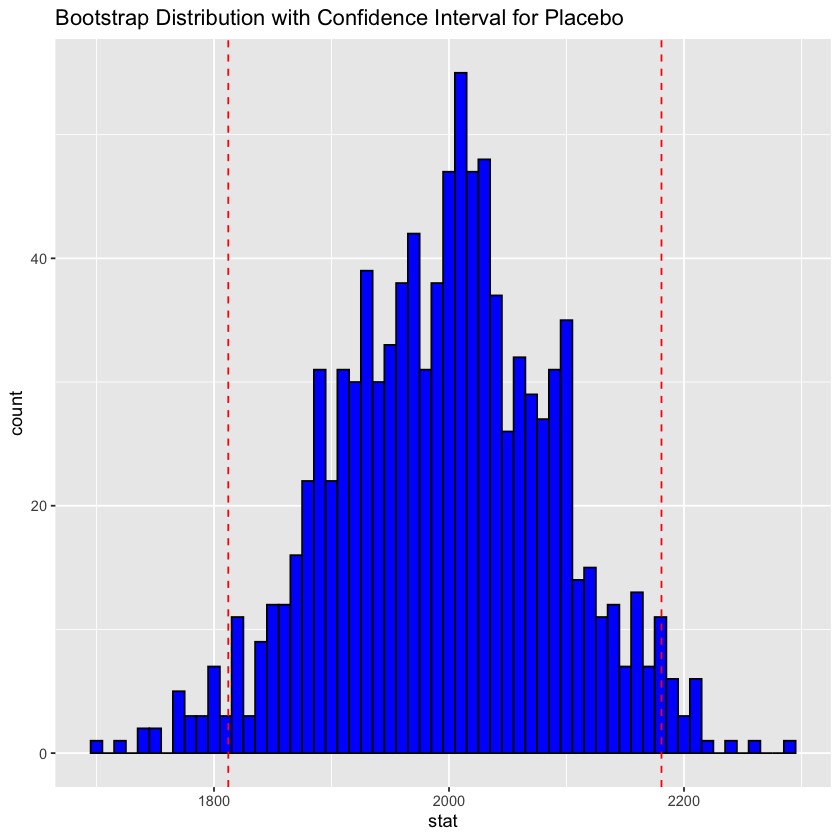

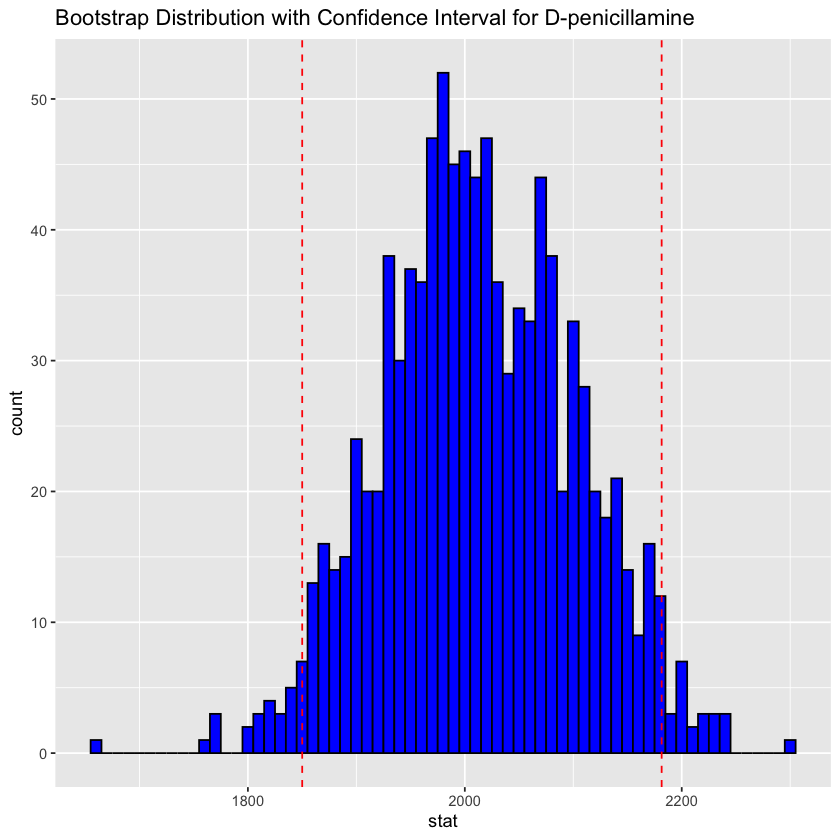

In [ ]:
#Visualize them.
ch_p_plot <- ggplot(ch_p_boots, aes(x = stat)) +
              geom_histogram(binwidth = 10, fill = "blue", color = "black") +
              geom_vline(xintercept = as.numeric(ch_p_ci[1]), color = "red", linetype = "dashed") +
              geom_vline(xintercept = as.numeric(ch_p_ci[2]), color = "red", linetype = "dashed") +
              labs(title = "Bootstrap Distribution with Confidence Interval for Placebo")

ch_d_plot <- ggplot(ch_d_boots, aes(x = stat)) +
              geom_histogram(binwidth = 10, fill = "blue", color = "black") +
              geom_vline(xintercept = as.numeric(ch_d_ci[1]), color = "red", linetype = "dashed") +
              geom_vline(xintercept = as.numeric(ch_d_ci[2]), color = "red", linetype = "dashed") +
              labs(title = "Bootstrap Distribution with Confidence Interval for D-penicillamine")

ch_p_plot
ch_d_plot

In [ ]:
#Build the bootstrapping distribution using Propotions.
ch_prop_p <- ch_sample |>
             specify(response = drug, success = "Placebo") |>
             generate(type = "bootstrap", reps = 1000) |>
             calculate(stat = "prop")
ch_p_prop_ci <- ch_prop_p |>
                get_ci(level = 0.95, type = "percentile")

ch_prop_d <- ch_sample |>
             specify(response = drug, success = "D-penicillamine") |>
             generate(type = "bootstrap", reps = 1000) |>
             calculate(stat = "prop")
ch_d_prop_ci <- ch_prop_d |>
                get_ci(level = 0.95, type = "percentile")
ch_p_prop_ci
ch_d_prop_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.4391026,0.5480769


lower_ci,upper_ci
<dbl>,<dbl>
0.4519231,0.5641026


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


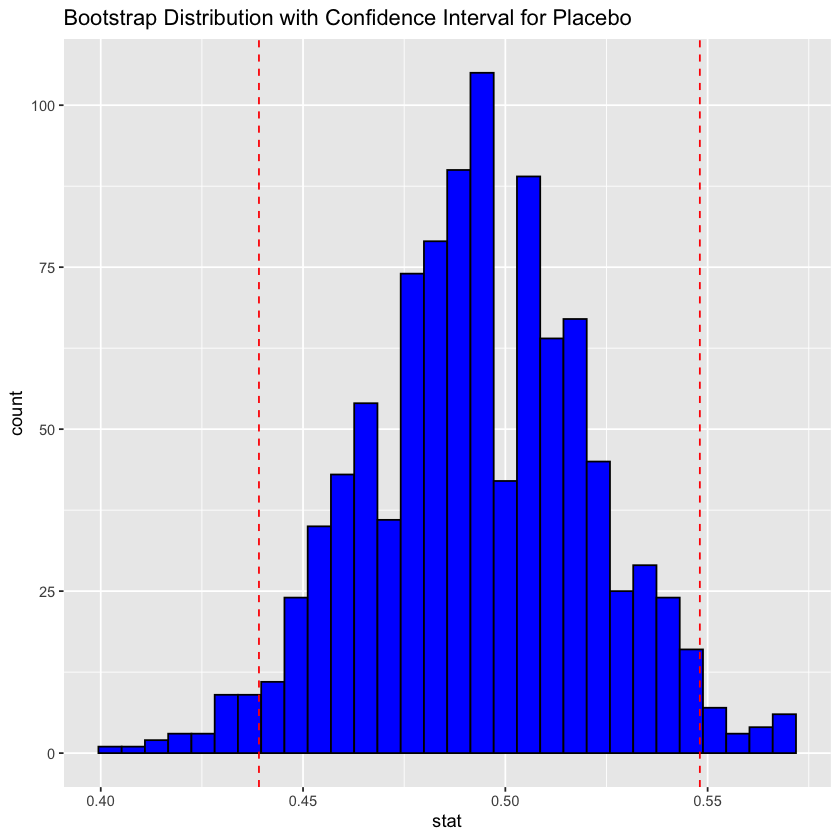

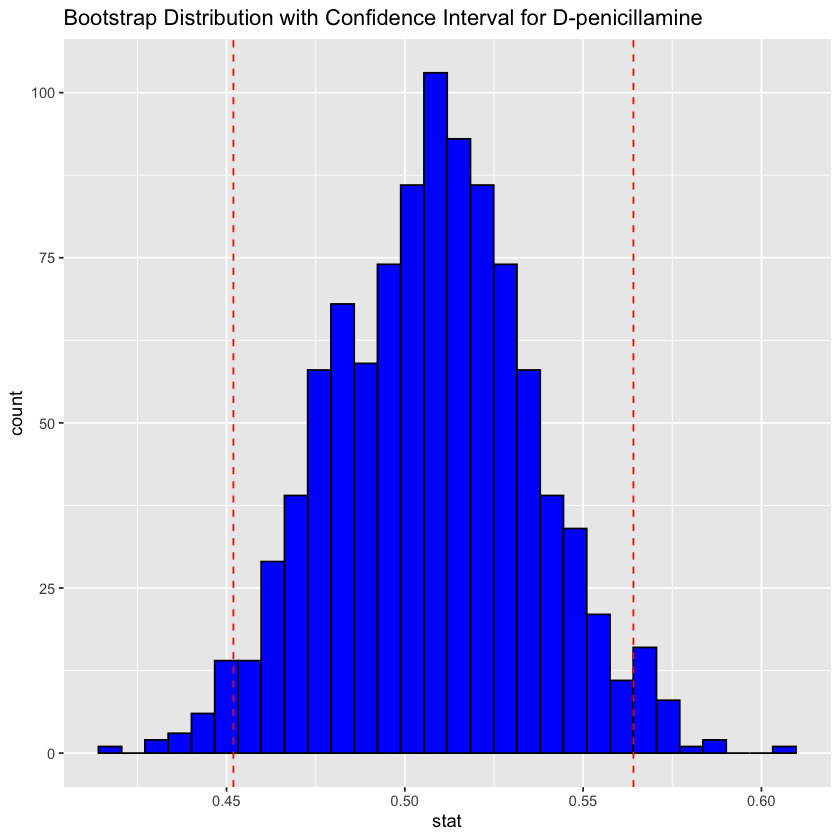

In [ ]:
#Visualize them.
ch_prop_p_plot <- ggplot(ch_prop_p, aes(x = stat)) +
              geom_histogram(fill = "blue", color = "black") +
              geom_vline(xintercept = as.numeric(ch_p_prop_ci[1]), color = "red", linetype = "dashed") +
              geom_vline(xintercept = as.numeric(ch_p_prop_ci[2]), color = "red", linetype = "dashed") +
              labs(title = "Bootstrap Distribution with Confidence Interval for Placebo")

ch_prop_d_plot <- ggplot(ch_prop_d, aes(x = stat)) +
              geom_histogram(fill = "blue", color = "black") +
              geom_vline(xintercept = as.numeric(ch_d_prop_ci[1]), color = "red", linetype = "dashed") +
              geom_vline(xintercept = as.numeric(ch_d_prop_ci[2]), color = "red", linetype = "dashed") +
              labs(title = "Bootstrap Distribution with Confidence Interval for D-penicillamine")

ch_prop_p_plot
ch_prop_d_plot

## References


Prince, M., Chetwynd, A., Newman, W., Metcalf, J. V., &amp; James, O. F. W. (2002). Survival and symptom progression in a geographically based cohort of patients with primary biliary cirrhosis: Follow-up for up to 28 years. Gastroenterology, 123(4), 1044–1051. __https://doi.org/10.1053/gast.2002.36027__

Purohit, T. (2015). Primary biliary cirrhosis: Pathophysiology, clinical presentation and therapy. World Journal of Hepatology, 7(7), 926. __https://doi.org/10.4254/wjh.v7.i7.926__

Dickson,E., Grambsch,P., Fleming,T., Fisher,L., and Langworthy,A.. (2023). Cirrhosis Patient Survival Prediction. UCI Machine Learning Repository. __https://doi.org/10.24432/C5R02G.__